# Sale Prediction

## Install Necessary Libraries

In [38]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tabulate

You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\SchoolWorks\Year 4\AI\Presentation\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


## Import Necessary Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate  # For table formatting
import time
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Set random seed for reproducibility
np.random.seed(42)

# Start total execution timer
start_total = time.time()

## Section 1: Data Loading

### Load the dataset (assuming advertising.csv is in the working directory)

In [41]:
data = pd.read_csv('data/advertising.csv')

In [42]:
# Basic information
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [43]:
# Display first few rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [44]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Section 2: Data Cleaning

### Check for missing values

In [45]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


### Drop duplicates if any

In [46]:
# Drop duplicates if any
data = data.drop_duplicates()
print("\nShape after removing duplicates:", data.shape)



Shape after removing duplicates: (200, 4)


### Drop the 'Unnamed: 0' column if it exists (index column from the dataset)

In [47]:
# Drop the 'Unnamed: 0' column if it exists (index column from the dataset)
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
    print("\nDropped 'Unnamed: 0' column")

## Section Extra: Data Visualization

In [48]:
print("\nVisualizing the Dataset:")


Visualizing the Dataset:


### 1. Scatter plots of each feature vs Sales

In [49]:
# 1. Scatter Plots (grouped together in a 1x3 layout for easy comparison)
plt.figure(figsize=(15, 4))
plt.suptitle('Scatter Plots: Advertising Budgets vs Sales', fontsize=16)

Text(0.5, 0.98, 'Scatter Plots: Advertising Budgets vs Sales')

<Figure size 1500x400 with 0 Axes>

#### TV vs Sales, Radio vs Sales, Newspaper vs Sales

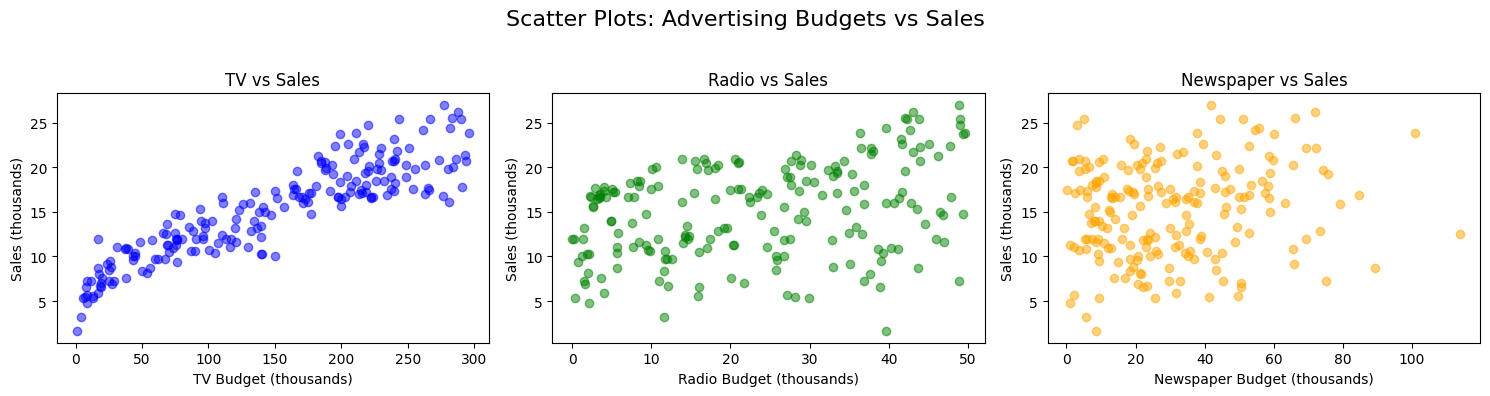

In [50]:
# 1. Scatter Plots (grouped together in a 1x3 layout for easy comparison)
plt.figure(figsize=(15, 4))
plt.suptitle('Scatter Plots: Advertising Budgets vs Sales', fontsize=16)

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'], color='blue', alpha=0.5)
plt.xlabel('TV Budget (thousands)')
plt.ylabel('Sales (thousands)')
plt.title('TV vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'], color='green', alpha=0.5)
plt.xlabel('Radio Budget (thousands)')
plt.ylabel('Sales (thousands)')
plt.title('Radio vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'], color='orange', alpha=0.5)
plt.xlabel('Newspaper Budget (thousands)')
plt.ylabel('Sales (thousands)')
plt.title('Newspaper vs Sales')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

### 2. Histograms for distribution of each variable

In [51]:
# 2. Histograms (grouped together in a 2x2 layout for easy comparison)
plt.figure(figsize=(12, 8))
plt.suptitle('Histograms: Distribution of Features and Sales', fontsize=16)

Text(0.5, 0.98, 'Histograms: Distribution of Features and Sales')

<Figure size 1200x800 with 0 Axes>

#### TV, Radio, Newspapaer, and Sales

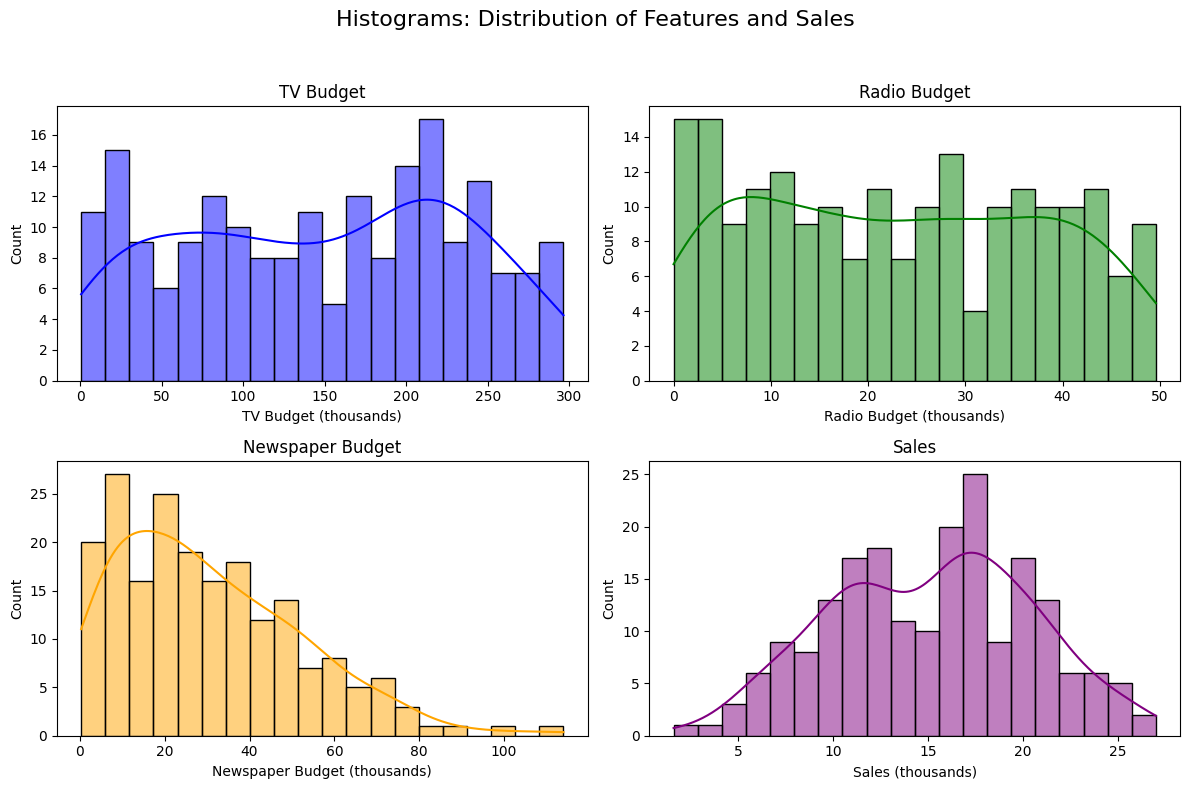

In [52]:
# 2. Histograms (grouped together in a 2x2 layout for easy comparison)
plt.figure(figsize=(12, 8))
plt.suptitle('Histograms: Distribution of Features and Sales', fontsize=16)

# TV
plt.subplot(2, 2, 1)
sns.histplot(data['TV'], bins=20, color='blue', kde=True)
plt.xlabel('TV Budget (thousands)')
plt.title('TV Budget')

# Radio
plt.subplot(2, 2, 2)
sns.histplot(data['Radio'], bins=20, color='green', kde=True)
plt.xlabel('Radio Budget (thousands)')
plt.title('Radio Budget')

# Newspaper
plt.subplot(2, 2, 3)
sns.histplot(data['Newspaper'], bins=20, color='orange', kde=True)
plt.xlabel('Newspaper Budget (thousands)')
plt.title('Newspaper Budget')

# Sales
plt.subplot(2, 2, 4)
sns.histplot(data['Sales'], bins=20, color='purple', kde=True)
plt.xlabel('Sales (thousands)')
plt.title('Sales')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

### 3. Box Plots (grouped in a single figure for all variables)

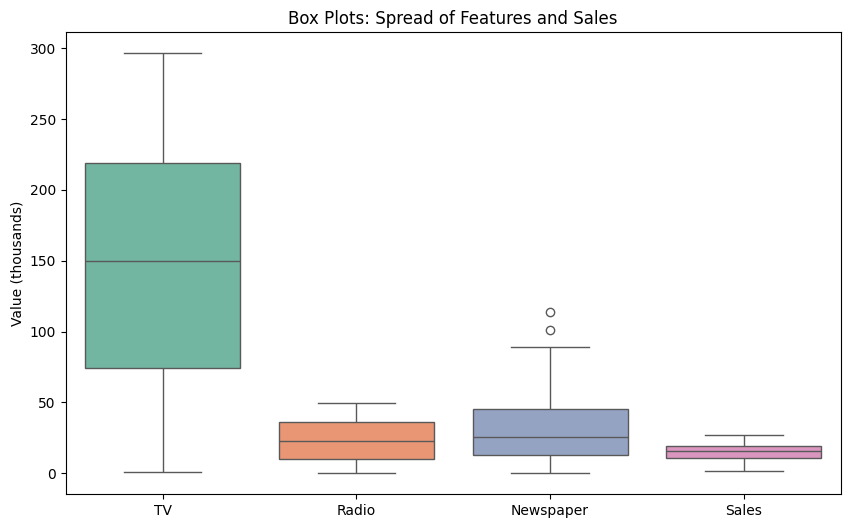

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper', 'Sales']], palette='Set2')
plt.title('Box Plots: Spread of Features and Sales')
plt.ylabel('Value (thousands)')
plt.show()

### 4. Correlation heatmap

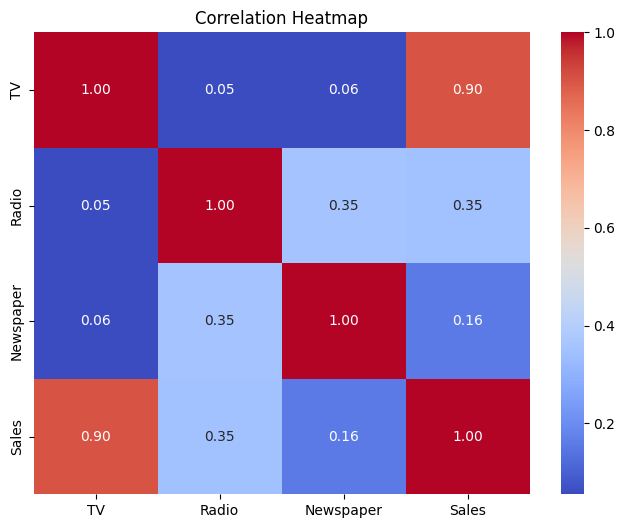

In [54]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Section 3: Outlier Detection and Handling

### Function to detect outliers using IQR

In [55]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

### Check for outliers in TV, Radio, Newspaper, and Sales

In [56]:
# Check for outliers in TV, Radio, Newspaper, and Sales
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    outliers = detect_outliers(data, column)
    print(f"\nOutliers in {column}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers)


Outliers in TV: 0

Outliers in Radio: 0

Outliers in Newspaper: 2
16     114.0
101    100.9
Name: Newspaper, dtype: float64

Outliers in Sales: 0


### Since the dataset is small, we’ll cap outliers instead of removing them

In [57]:
# Since the dataset is small, we’ll cap outliers instead of removing them
for column in ['TV', 'Radio', 'Newspaper', 'Sales']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

In [58]:
print("\nData after handling outliers:")
print(data.describe())


Data after handling outliers:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.415750   15.130500
std     85.854236   14.846809   21.316901    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000   93.625000   27.000000


## Section 4: Data Normalization

### Features and target

In [59]:
# Features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

### Normalize features using StandardScaler

In [60]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features (first 5 rows):")
print(X_scaled.head())



Scaled Features (first 5 rows):
         TV     Radio  Newspaper
0  0.969852  0.981522   1.823979
1 -1.197376  1.082808   0.690583
2 -1.516155  1.528463   1.828682
3  0.052050  1.217855   1.320770
4  0.394182 -0.841614   1.316067


## Section 5: Data Encoding

### No categorical variables in this dataset, so encoding is not required

In [61]:
# No categorical variables in this dataset, so encoding is not required
print("\nNo categorical variables to encode.")


No categorical variables to encode.


## Section 6: Data Splitting

### Split the data into training and testing sets

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (160, 3)
Testing set shape: (40, 3)


## Section 7: Model Training - Linear Regression

### Initialize and train Linear Regression

In [63]:
# Initialize and train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Predict on test set

In [64]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

### Evaluate Linear Regression

In [65]:
# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)  # Calculate RMSE
lr_r2 = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Performance:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"Root Mean Squared Error: {lr_rmse:.2f} thousand units")
print(f"R² Score: {lr_r2:.2f}")


Linear Regression Performance:
Mean Squared Error: 2.91
Root Mean Squared Error: 1.71 thousand units
R² Score: 0.91


## Section 8: Model Training - Random Forest

### Initialize and train Random Forest

In [66]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Predict on test set

In [67]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)

### Evaluate Random Forest

In [68]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)  # Calculate RMSE
rf_r2 = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f} thousand units")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Performance:
Mean Squared Error: 1.44
Root Mean Squared Error: 1.20 thousand units
R² Score: 0.95


## Section 9: Model Comparison

### Comparision

In [69]:
print("\nModel Comparison:")
# Create a table for metrics
table_data = [
    ["Linear Regression", f"{lr_mse:.2f}", f"{lr_rmse:.2f}", f"{lr_r2:.2f}"],
    ["Random Forest", f"{rf_mse:.2f}", f"{rf_rmse:.2f}", f"{rf_r2:.2f}"]
]
headers = ["Model", "MSE", "RMSE (thousand units)", "R² Score"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

if lr_r2 > rf_r2:
    print("Linear Regression has higher accuracy (R² score).")
else:
    print("Random Forest has higher accuracy (R² score).")


Model Comparison:
+-------------------+-------+-------------------------+------------+
| Model             |   MSE |   RMSE (thousand units) |   R² Score |
+===================+=======+=========================+============+
| Linear Regression |  2.91 |                    1.71 |       0.91 |
+-------------------+-------+-------------------------+------------+
| Random Forest     |  1.44 |                    1.2  |       0.95 |
+-------------------+-------+-------------------------+------------+
Random Forest has higher accuracy (R² score).


## Section 10: Visualization

### Plot actual vs predicted for both models

In [70]:
# Plot actual vs predicted for both models
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

### Linear Regression and Random Forest

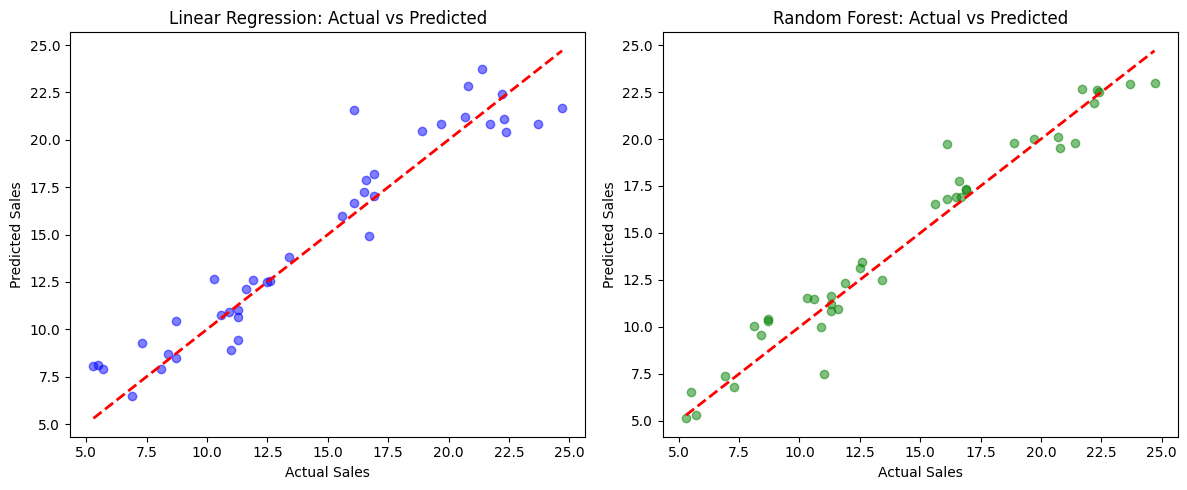

In [71]:
# Plot actual vs predicted for both models
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted')

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

## Section 12: Prediction with Hardcoded Input

In [72]:
def predict_sales(tv, radio, newspaper, scaler, lr_model, rf_model):
    # Create a DataFrame for the input
    input_data = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])
    
    # Scale the input using the same scaler
    input_scaled = scaler.transform(input_data)
    
    # Predict using both models
    lr_prediction = lr_model.predict(input_scaled)[0]
    rf_prediction = rf_model.predict(input_scaled)[0]
    
    return lr_prediction, rf_prediction

In [73]:
# Hardcoded input values (edit these values as needed)
tv_budget = 150.0      # TV budget in thousands
radio_budget = 30.0    # Radio budget in thousands
newspaper_budget = 20.0  # Newspaper budget in thousands

print(f"\nPredicting Sales for: TV = {tv_budget}, Radio = {radio_budget}, Newspaper = {newspaper_budget}")

# Validate inputs
if tv_budget < 0 or radio_budget < 0 or newspaper_budget < 0:
    print("Error: Budgets cannot be negative.")
else:
    # Make predictions
    lr_pred, rf_pred = predict_sales(tv_budget, radio_budget, newspaper_budget, scaler, lr_model, rf_model)
    print(f"Predicted Sales (Linear Regression): {lr_pred:.2f} thousand units")
    print(f"Predicted Sales (Random Forest): {rf_pred:.2f} thousand units")
    
    # Suggest which model to trust based on R²
    print(f"\nNote: Based on R² scores, {'Random Forest' if rf_r2 > lr_r2 else 'Linear Regression'} "
          f"performed better on test data (R² = {max(rf_r2, lr_r2):.2f}).")


Predicting Sales for: TV = 150.0, Radio = 30.0, Newspaper = 20.0
Predicted Sales (Linear Regression): 16.00 thousand units
Predicted Sales (Random Forest): 15.58 thousand units

Note: Based on R² scores, Random Forest performed better on test data (R² = 0.95).


In [74]:
# Print total execution time
end_total = time.time()
print(f"\nTotal Execution Time: {end_total - start_total:.2f} seconds")


Total Execution Time: 3.49 seconds
